# [実験] 成分のほとんど同じベクトルをPCAにかけるとどうなるか

期待結果：　成分の異なる部分がそのまま再現される

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.style.use('ggplot')

## 成分の異なる部分を準備
円周上に等間隔で点をうち、その点の座標を「成分の異なる部分」として使用する。

In [2]:
n_data = 20
rad = 2 * np.pi * np.arange(n_data) / n_data

In [3]:
rad

array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
       1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
       3.14159265, 3.45575192, 3.76991118, 4.08407045, 4.39822972,
       4.71238898, 5.02654825, 5.34070751, 5.65486678, 5.96902604])

In [4]:
R = 1.  # radius
X_c, Y_c = R * np.cos(rad), R * np.sin(rad)    # "_c" means "circle"

In [5]:
X_c

array([ 1.00000000e+00,  9.51056516e-01,  8.09016994e-01,  5.87785252e-01,
        3.09016994e-01,  6.12323400e-17, -3.09016994e-01, -5.87785252e-01,
       -8.09016994e-01, -9.51056516e-01, -1.00000000e+00, -9.51056516e-01,
       -8.09016994e-01, -5.87785252e-01, -3.09016994e-01, -1.83697020e-16,
        3.09016994e-01,  5.87785252e-01,  8.09016994e-01,  9.51056516e-01])

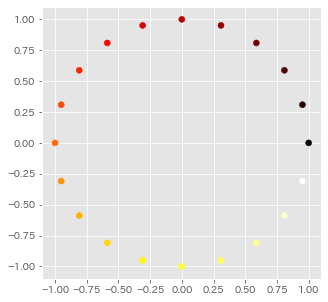

In [6]:
import matplotlib.cm as cm

plt.figure(figsize=(5, 5))

xlim = (-1.1, 1.1)
ylim = (-1.1, 1.1)

plt.xlim(xlim)
plt.ylim(ylim)
#plt.pcolor(X_c, Y_c, rad, cmap=plt.cm.hot)
plt.scatter(X_c, Y_c, c=rad, cmap=cm.hot)

plt.show()

## 多次元ベクトルの生成
そのうちの先頭2次元分を、上記の円周上の座標で置き換える

In [7]:
n_dim = 300
data = np.ones((n_dim, n_data))

# 円周上の座標で一部置き換え
data[0, :] = X_c
data[1, :] = Y_c

data = data.T  # transpose: (n_dim, n_data) -> (n_data, n_dim)

In [8]:
data

array([[ 1.        ,  0.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.95105652,  0.30901699,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.80901699,  0.58778525,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 0.58778525, -0.80901699,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.80901699, -0.58778525,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.95105652, -0.30901699,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

## 次元圧縮
PCAを使用

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)

_features = pca.fit_transform(data)

In [11]:
_features.shape

(20, 2)

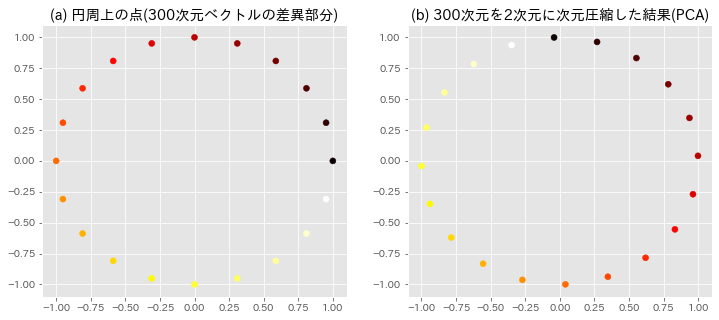

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
xlim = (-1.1, 1.1)
ylim = (-1.1, 1.1)

plt.title('(a) 円周上の点({}次元ベクトルの差異部分)'.format(n_dim))
plt.xlim(xlim)
plt.ylim(ylim)
plt.scatter(X_c, Y_c, c=rad, cmap=cm.hot)


plt.subplot(122)
xlim = (-1.1, 1.1)
ylim = (-1.1, 1.1)

plt.title('(b) {}次元を2次元に次元圧縮した結果(PCA)'.format(n_dim))
plt.xlim(xlim)
plt.ylim(ylim)
plt.scatter(_features[:, 0], _features[:, 1], c=rad, cmap=cm.hot)

plt.show()

##### ⇒期待通り、成分の異なる部分(円周上の点)が再現された。
※ 元の円周とは90°異なっているが、議論の本質には影響しない。